In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
r = pd.read_csv('train.csv')
r.shape
l=r['label']
print(l.shape)
k=r.drop("label",axis=1)
print(k.shape)
plt.figure(figsize=(8,8))
id=123
g=k.iloc[id].values.reshape(28,28)
plt.imshow(g,interpolation='none', cmap='gray')
plt.show()
print(l[id])

(42000,)
(42000, 784)


<Figure size 800x800 with 1 Axes>

6


In [2]:
data=k.head(15000)
labels=l.head(15000)
data.shape
labels.shape
#data preprocessing-column standardisation


(15000,)

In [3]:
#data preprocessing-column standardisation
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
n=42000
Standardized_data = StandardScaler().fit_transform(k)
print(Standardized_data.shape)
#cov-variance of the Standardized data
cov_matrix=np.matmul(Standardized_data.T,Standardized_data)/n
print(cov_matrix.shape)
#finding eigen values and eigen vectors
values,vectors = eigh(cov_matrix,eigvals=(782,783))
vectors=vectors.T
vectors

(42000, 784)
(784, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
#transfroming 784D to 2D
import matplotlib.pyplot as plt
import pandas as pd
newcoordinates = np.matmul(vectors,Standardized_data.T)
newcoordinates.shape
#appending label to the newcoordinates
newcoordinates=np.vstack((newcoordinates,l)).T
print(newcoordinates.shape)
frame= pd.DataFrame(data=newcoordinates,columns=("secondprincipal","firstprincipal","label"))
print(frame.head())


(42000, 3)
   secondprincipal  firstprincipal  label
0        -5.226445       -5.140478    1.0
1         6.032996       19.292332    0.0
2        -1.705813       -7.644503    1.0
3         5.836139       -0.474207    4.0
4         6.024818       26.559574    0.0


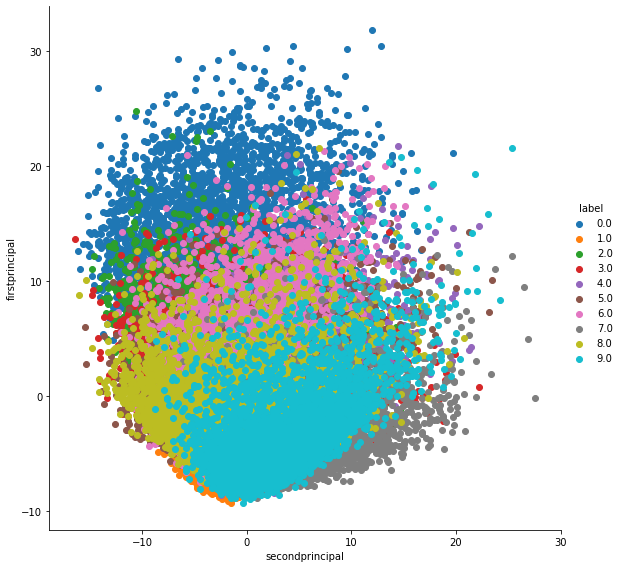

In [5]:
#plotting the new 2d data
import seaborn as sn

sn.FacetGrid(frame,hue='label',height=8).map(plt.scatter,"secondprincipal","firstprincipal").add_legend()
plt.show()

(42000, 2)
(42000, 3)


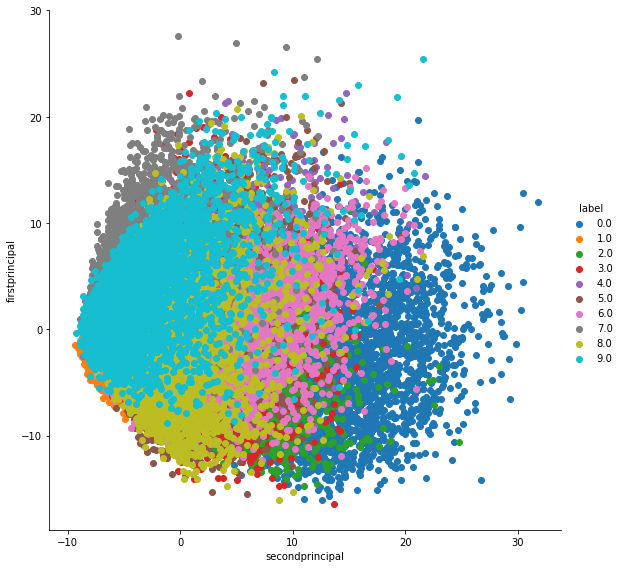

In [6]:
from sklearn import decomposition
import pandas as pd
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(Standardized_data)
print(pca_data.shape)
pca_data =np.vstack((pca_data.T,l)).T
print(pca_data.shape)
frame1= pd.DataFrame(data=pca_data,columns=("secondprincipal","firstprincipal","label"))
sn.FacetGrid(frame1,hue='label',height=8).map(plt.scatter,"secondprincipal","firstprincipal").add_legend()
plt.show()

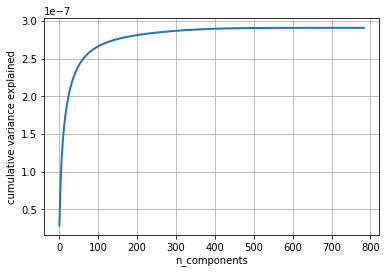

In [7]:
#PCA for Dimensionality reduction(not visualization)
from sklearn import decomposition
pca.n_components=784
pca_data=pca.fit_transform(k)
percentage_var_explained=pca.explained_variance_ratio_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative variance explained")
plt.show()

In [8]:
from sklearn import decomposition
pca.n_components=784
pca_data=pca.score_samples(k)
pca_data


array([-315.16802499, -565.31991527, -345.5690861 , ..., -567.11076625,
       -504.89109554, -386.18154168])

In [10]:
from sklearn.manifold import TSNE
data_1000 = k[0:1000:]
label_1000=l[0:1000]
model=TSNE(n_components=2, random_state=0)
tsne_data=model.fit_transform(k)
tsne_data = np.vstack(tsne_data.T).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("dim1","dim2","label"))
sns.FacetGrid(tsne_df,hue="label",height=8).map(plt.scatter,'dim1','dim2')
plt.show()

ValueError: Shape of passed values is (42000, 2), indices imply (42000, 3)